In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import _california_housing
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = _california_housing.fetch_california_housing(as_frame=True).frame

In [3]:
df.to_csv("out.csv", encoding='utf-8', index=False)  

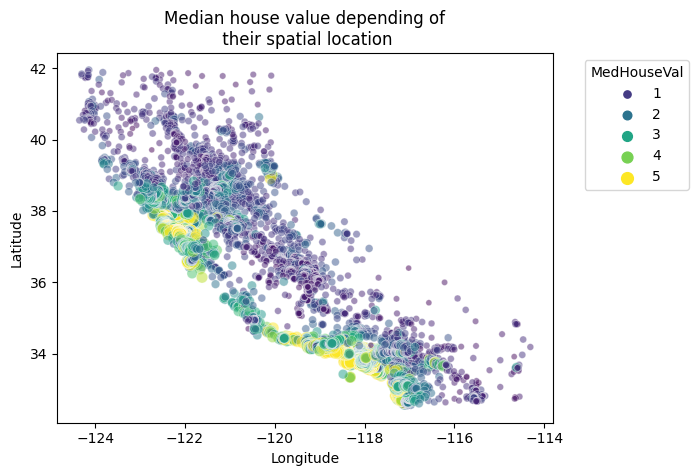

In [4]:
#Afficher le prix moyen des maisons par rapport a leur localisation

sns.scatterplot(df,
                x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

plt.show()

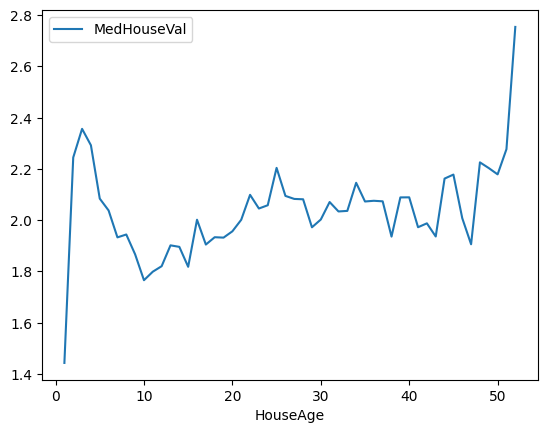

In [5]:
#Prix moyen en fonction de l'age des maisons

df0 = df.groupby(by="HouseAge",as_index=False).mean()

df0.plot.line(x="HouseAge", y='MedHouseVal')

plt.show()

In [ ]:
#Prix moyen en fonction au nombre de chambres
df1 = df.groupby(by="AveBedrms",as_index=False).mean()

df1.plot.line(x="AveBedrms", y='MedHouseVal')
plt.show()

In [ ]:
#Prix moyen en fonctiona du nombre de pièces
df2 = df.groupby(by="AveRooms",as_index=False).mean()

df2.plot.line(x="AveRooms", y='MedHouseVal')

plt.show()

In [1]:
#Definition du modele
target_name = "MedHouseVal"
target = df[target_name]

#Colonnes exclues pour le 
data = df.drop(columns=[target_name, "AveOccup", "Population", "HouseAge", "AveBedrms" , "AveRooms"])

#
model = KNeighborsRegressor()
_ = model.fit(data, target)

target_predicted = model.predict(data)
print(target[:5])
print(target_predicted[:5])
print(f"Number of correct prediction: "
      f"{(target[:5] == target_predicted[:5]).sum()} / 5")



NameError: name 'df' is not defined

In [ ]:
target_test = df[target_name]

x_train, data_test, y_train, target_test = train_test_split(data, target, test_size=0.25, random_state=88)

accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is "
      f"{accuracy * 100:.3f}")

In [ ]:
selectedCol = "AveRooms"

plt.figure(figsize=(10,10))
plt.scatter(x=selectedCol,y='MedHouseVal',data=data)
plt.xlabel(selectedCol)
plt.ylabel('MedHouseVal')

In [ ]:
data = df.drop(columns=["Latitude", "Longitude"])

plt.figure(figsize=(8,5))

sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
#Heatmap

data = df.drop(columns=["Latitude", "Longitude"])
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
y = df["MedHouseVal"]
x = df.drop("MedHouseVal", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.01,
                                                    random_state=42
                                                    )

modele_rf = RandomForestClassifier(
    # il s’agit du nombre d’arbres dans la forêt
    n_estimators=5,
    # il s’agit du critère utilisé pour construire les arbres et séparer les branches des arbres
    criterion='gini',
    # il s’agit de la profondeur maximale des arbres utilisés (le nombre de niveaux dans l’arbre de décision)
    max_depth=None,
    # il s’agit du nombre d’échantillons minimal dans une feuille pour refaire une séparation
    min_samples_split=2,
    # il s’agit du nombre d’échantillons minimal pour créer une feuille
    min_samples_leaf=1,
    # il s’agit de la fraction du nombre total d’échantillon minimal pour créer une feuille
    min_weight_fraction_leaf=0.0,
    # il s’agit du nombre maximal de feuilles
    max_leaf_nodes=None,
    # il s’agit de la baisse minimale du critère d’impureté pour faire une séparation
    min_impurity_decrease=0.0,
    # paramètre pour utiliser du bootstrap, si il est à False, le même échantillon est pris pour chaque arbre
    bootstrap=True,
    # ??
    oob_score=False,
    # nombre de traitements à effectuer en parallèle
    n_jobs=None,
    # graine aléatoire
    random_state=None,
    # ??
    verbose=0,
    # ceci permet de repartir du résultat du dernier apprentissage pour faire l’apprentissage
    warm_start=False,
    # il s’agit des poids associés à chaque classe si cela a un sens
    class_weight=None,
    # ??
    ccp_alpha=0.0,
    # si vous voulez réduire le nombre d’observations dans vos échantillons bootstrap
    max_samples=None,
)

modele_rf.fit(x_train, y_train)

In [ ]:
importance = pd.DataFrame(modele_rf.feature_importances_,
                          index=x_train.columns,
                          columns=["importance"]).sort_values("importance",
                                                              ascending=False
                                                              )

print(importance)